<a href="https://colab.research.google.com/github/FrancescoZanni/MLPNS_FZanni/blob/main/notes/bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#wordle


In [ ]:
target= "acres"
guess = "acrea"
test = ["_"]*5

if target == guess:
  print("Well done, the world was ", goal)
else:
  print("try again")
  for i in range(len(guess)):
    if guess[i]== target[i]:
      test[i]==guess[i]
    elif guess[i] in target:
      test[i] = "*"
  
  print("".join(test))
  

try again
____*


In [ ]:
import pandas as pd

In [ ]:
url = "https://raw.githubusercontent.com/fedhere/PyBOOT/master/311_Service_Requests_from_2010_to_Present.csv"
df = pd.read_csv(url)  #organizzato in una variabile di tipo dataframe
#osservazioni sull'asse x e variabili sull'asse y


In [ ]:
df.shape    #numero righe e colonne 
df.columns  #elenca le colonne
df.iloc[2]  #mostra una riga 
df.iloc[:,1] #tutte le righe seconda colonna: data e ora di tutte le chiamate
df.loc[:, "Created Date"] #tutte le righr seleziona la colonna che ha come nome "created date"

0      05/01/2022 12:00:03 AM
1      05/01/2022 12:00:09 AM
2      05/01/2022 12:00:17 AM
3      05/01/2022 12:00:21 AM
4      05/01/2022 12:00:25 AM
                ...          
919    05/01/2022 02:04:45 AM
920    05/01/2022 02:05:35 AM
921    05/01/2022 02:05:38 AM
922    05/01/2022 02:06:13 AM
923    05/01/2022 02:06:26 AM
Name: Created Date, Length: 924, dtype: object

In [ ]:
url2="https://raw.githubusercontent.com/fedhere/UInotebooks/master/dataWrangling/movies.dat"
#df = pd.read_csv(url2) non funziona, non è un csv, devo dire a pandas che cosa è il separatore
pd.read_csv(url2, sep="::") #ho un doppio indice, in csv aveva un indice ma pandas lo aggiunge di default
pd.read_csv(url2, sep="::", index_col=0)  #ok per l'indice ma mi mette la prima riga di default come header
pd.read_csv(url2, sep="::", index_col=0, header=None) #mette come headers 0 1 2, rimedio creando una lista degli header
movies = pd.read_csv(url2, sep="::", index_col=0, header=None,names = ["title","genre"])  #di default skippa la colonna indice, l'ho chiamato movies




/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
len(movies["genre"].unique())   #conto quanti sono i generi unici, anche se in realtà ho combinazioni

301

In [ ]:
#Voglio estrarre l'anno, che è incorporato nel titolo, ma so come farlo perchè lavoro con stringhe
#uso split: taglia una stringa a metà in base al carattere che specifico
#l'ultimo elemento della lista è l'elemento numero -1 (l'end di matlab)
#posso usare replace per rimpiazzare dei caratteri: 
#posso usare strip per togliere l'ultimo carattere se è uguale a un carattere specifico, tipo il punto alla fine della frase 


"Toy Story (1995)".split()[-1].replace("(","").strip(")")

'1995'

In [ ]:
def get_year(mtitle):
  """
  """
  return int (mtitle.split("(")[-1].strip(")"))

In [ ]:
movies["title"].map(get_year)   #applico la funzione alla colonna title di tutto il dataframe

1       1995
2       1995
3       1995
4       1995
5       1995
        ... 
3948    2000
3949    2000
3950    2000
3951    2000
3952    2000
Name: title, Length: 3883, dtype: int64

In [ ]:
movies["year"]= movies["title"].map(get_year) #crea la nuova colonna

In [ ]:
movies.groupby("year").count() #raggruppa sulla base di un valore in questo caso dell'anno e conte: ritorna un dataframe!

,title,genre,fan
year,,,
1919,3,3,3
1920,2,2,2
1921,1,1,1
1922,2,2,2
1923,3,3,3
...,...,...,...
1996,345,345,345
1997,315,315,315
1998,337,337,337


#Assignment lez.2 


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/fedhere/UInotebooks/master/dataWrangling/movies.dat"
colnames = ["title", "genre"]
movies = pd.read_csv(url, sep="::", index_col=0, header=None, names=colnames);
movies

/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,title,genre
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama


In [ ]:

def get_genres(mgen):
  """
  """
  return mgen.split("|")
  

In [ ]:
movies["genre"]=movies["genre"].map(get_genres)

In [ ]:
movies.iloc[3]

title    Waiting to Exhale (1995)
genre             [Comedy, Drama]
Name: 4, dtype: object

In [ ]:
Nfantasy =0
for i in range(len(movies)):
  if "Adventure" in movies.iloc[i]["genre"]:
    Nfantasy=Nfantasy+1
Nfantasy

283

In [ ]:
def isfan(genre):
  if "Fantasy" in genre:
    return "isFantasy"
  else: 
    return "isNotFantasy"

In [ ]:
movies["fan"]=movies["genre"].map(isfan)

In [ ]:
movies.groupby("fan").count()

,title,genre
fan,,
isFantasy,68,68
isNotFantasy,3815,3815


#Lezione 3


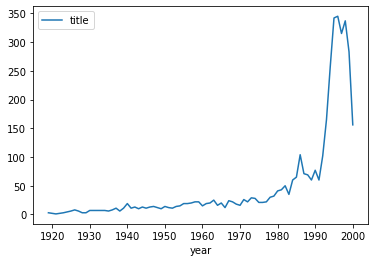

In [ ]:
#riparto dal dataframe film 
movies.groupby("year").count().plot(y="title");  #se uso solo il groupby non mi è utile, non restituisce un dataframe
#posso usare il groupby per fare statistica sui gruppi
#l'operazione viene fatta su ciascuno colonna del dataframe, quindi avrei 3 colonne uguali!

##Correzione compito e fine di pandas


In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/fedhere/UInotebooks/master/dataWrangling/movies.dat"
colnames = ["title", "genre"]
movies = pd.read_csv(url, sep="::", index_col=0, header=None, names=colnames);


/usr/local/lib/python3.9/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
movies.genre[1] #come prima cosa utile capire come sono fatti gli elementi della colonna che mi interessa (qua l'indice parte da 1 quindi non c'è lo 0)
movies["genres"]=movies.genre.map(lambda x: x.split("|"))  #equivale a definire la funzione al volo in matlab con @(?))
movies[movies["genre"]=="Fantasy"]   #ritorna l'unico film che ha soltanto il genere fantasy




,title,genre,genres,year
792,"Hungarian Fairy Tale, A (1987)",Fantasy,[Fantasy],1987


In [ ]:
glist=[]
for m in movies["genre"]:
  break
  #print("Fantasy" in m)   #stampo semplicemente true o false
  #glist.append("Fantasy" in m)  metto true o false in una lista
#glist

In [ ]:
#list comprehension
["Fantasy" in m for m in movies["genre"]]   #è come un for al contrario, in un solo comando stampo tutti i true e false, oppure lo assegno a una variabile
movies[["Fantasy" in m for m in movies["genre"]]] #se faccio così mi stampa tutti i film che rispettano quella codizione, cioè per i quali il risultato sarebbe true


,title,genre,genres,year
2,Jumanji (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",1995
56,Kids of the Round Table (1995),Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",1995
60,"Indian in the Cupboard, The (1995)",Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",1995
126,"NeverEnding Story III, The (1994)",Adventure|Children's|Fantasy,"[Adventure, Children's, Fantasy]",1994
247,Heavenly Creatures (1994),Drama|Fantasy|Romance|Thriller,"[Drama, Fantasy, Romance, Thriller]",1994
...,...,...,...,...
3479,Ladyhawke (1985),Adventure|Fantasy|Romance,"[Adventure, Fantasy, Romance]",1985
3489,Hook (1991),Adventure|Fantasy,"[Adventure, Fantasy]",1991
3877,Supergirl (1984),Action|Adventure|Fantasy,"[Action, Adventure, Fantasy]",1984
3889,Highlander: Endgame (2000),Action|Adventure|Fantasy,"[Action, Adventure, Fantasy]",2000


In [ ]:
#se volessi vedere quali sono le associazioni più strane: 
movies.groupby("genre").count()[movies["genre"]].["title"==1] #?????? manca un pezzo!

SyntaxError: ignored

In [ ]:
movies[movies["genre"]=="Musical|War"]

,title,genre,genres,year
3545,Cabaret (1972),Musical|War,"[Musical, War]",1972


In [ ]:
groupedmovies = movies.groupby("genre").count()

In [ ]:
groupedmovies.describe() #analisi statistica al volo in automatico

,title,genres,year
count,301.000000,301.000000,301.000000
mean,12.900332,12.900332,12.900332
std,60.277055,60.277055,60.277055
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,5.000000,5.000000,5.000000
max,843.000000,843.000000,843.000000


In [ ]:
groupedmovies.sort_values(by="title", ascending=False)

,title,genres,year
genre,,,
Drama,843,843,843
Comedy,521,521,521
Horror,178,178,178
Comedy|Drama,162,162,162
Comedy|Romance,142,142,142
...,...,...,...
Animation|Children's|Drama|Fantasy,1,1,1
Animation|Children's|Fantasy|War,1,1,1
Animation|Children's|Musical|Romance,1,1,1


## Numpy

In [ ]:
import numpy as np

In [ ]:
a = np.int16(3) #definisco io il numero di bits dedicati alla variabile

In [ ]:
a=np.int8(3)  #tipo che viene usato la maggior parte delle volte per le immagine, mi bastano 255 valori 
              #posso storarci dentro numeri da -128 a 128

In [ ]:
a=np.uint8(3) #questo è davvero quello delle immagini, così va da 0 a 255

In [ ]:
#array
#a contrario delle liste hanno una quantità di memoria definita
#nelle liste dò l'inizio e poi ci posso mettere i tipi che voglio e quante cose voglio
#negli array invece definisco all'inizio la lunghezza e tutti gli elementi sono dello stesso tipo, rendo efficiente maneggiarlo

a=np.array(glist) #uso la lista di prima e la faccio diventare un array
#se gli do una lista con titpi diversi mette tutto del tipo più complesso

In [ ]:
np.zeros(10, float) #vuole sapere il tipo e il numero di elementi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#posso creare array multidimensionali
np.zeros((10,2), float)

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [ ]:
randArr = np.random.randn(10,2,3) #distribuzione normale
#np.random è il sottopacchetto di numpy

In [ ]:
#estraggo certi elementi: 
randArr[0]  #estrae la prima "colonna", praticamente il [0,:,:] di matlab

(2, 3)

In [ ]:
randArr[1:6] #salto la riga 0 e arrivo fino alla 5
#mi riferirò alle dimensioni come "assi"

array([[[ 1.18548375,  0.7247086 , -0.18193331],
        [-1.65724244,  1.3852702 ,  1.01571899]],

       [[-0.25275077,  0.17868006,  1.66680077],
        [ 1.78571885,  0.36601649,  0.13419845]],

       [[-1.51534959, -1.99074384,  0.72236315],
        [-0.15096865,  0.72666249, -0.19863105]],

       [[ 0.94025224,  0.80089729,  1.07465031],
        [-0.67666681, -0.15753833,  1.44535176]],

       [[ 1.04476627,  1.28208038,  0.49538485],
        [-0.16325621,  0.92120342,  0.62510973]]])

In [ ]:
randArr[:, 0]  #estraggo tutte le righe ma soltanto la prima colonna (e poi tutte le righe nella terza direzione )

#tutto questo scegliere il sottoinsieme giusto dell'array si chiama SLICING, è efficiente perchè python non ha bisogno di storare una copia del subset

array([[-0.92480356,  0.54696948,  0.22671111],
       [ 1.18548375,  0.7247086 , -0.18193331],
       [-0.25275077,  0.17868006,  1.66680077],
       [-1.51534959, -1.99074384,  0.72236315],
       [ 0.94025224,  0.80089729,  1.07465031],
       [ 1.04476627,  1.28208038,  0.49538485],
       [-1.47400721, -1.07151289, -0.69526785],
       [-1.9229374 ,  0.22434376,  0.25486572],
       [-0.6623743 , -0.03586061,  1.22279485],
       [ 0.78952508,  1.73843626,  2.00900396]])

In [ ]:
#BROADCASTING: scegliere sulla base di una condizione
randArr[randArr>0] #i dati vengono estratti: il risultato è unidimensionale della lunghezza pari al numero di dati che soddisfano la condizione 

(37,)

In [ ]:
#equivalente del range ma in un array e non un "iterator", lo posso usare anche con numeri decimali
randArr2 = np.arange(2.5) #se faccio così va di 1 in 1 fino all'intero più piccolo di quello dato

In [ ]:
rangeArr1 = np.arange(0,100,1) #così invece specifico il passo, uguale a matlab
rangeArr1.shape

(100,)

In [ ]:
#per ora è 100x1
#cambio la dimensione
rangeArr1 = rangeArr1.reshape(10,10)
rangeArr1.shape
#ora è un 10x10

(10, 10)

In [ ]:
#posso fare operazioni matematiche sull' array e le fa su ogni elemento
rangeArr1*2  #moltiplico per 2 ogni elemento
#se lo facessi con la lista mi concatena 2 volte la stessa lista

array([[  0,   2,   4,   6,   8,  10,  12,  14,  16,  18],
       [ 20,  22,  24,  26,  28,  30,  32,  34,  36,  38],
       [ 40,  42,  44,  46,  48,  50,  52,  54,  56,  58],
       [ 60,  62,  64,  66,  68,  70,  72,  74,  76,  78],
       [ 80,  82,  84,  86,  88,  90,  92,  94,  96,  98],
       [100, 102, 104, 106, 108, 110, 112, 114, 116, 118],
       [120, 122, 124, 126, 128, 130, 132, 134, 136, 138],
       [140, 142, 144, 146, 148, 150, 152, 154, 156, 158],
       [160, 162, 164, 166, 168, 170, 172, 174, 176, 178],
       [180, 182, 184, 186, 188, 190, 192, 194, 196, 198]])

In [ ]:
#posso fare la moltiplicazione, che è elemento per elemento, non in termini di matrici come matlab
rangeArr1 * rangeArr1  #la dimensione deve essere la stessa se no non me lo fa

array([[   0,    1,    4,    9,   16,   25,   36,   49,   64,   81],
       [ 100,  121,  144,  169,  196,  225,  256,  289,  324,  361],
       [ 400,  441,  484,  529,  576,  625,  676,  729,  784,  841],
       [ 900,  961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521],
       [1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401],
       [2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481],
       [3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761],
       [4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241],
       [6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921],
       [8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]])

In [ ]:
rangeArr1* randArr[:,0,0] #la stessa colonna viene moltiplicata per tutte le colonne dell'array originale

array([[  -0.        ,    1.18548375,   -0.50550155,   -4.54604876,
           3.76100897,    5.22383135,   -8.84404325,  -13.46056181,
          -5.29899437,    7.10572569],
       [  -9.24803564,   13.04032126,   -3.03300929,  -19.69954464,
          13.1635314 ,   15.67149405,  -23.58411532,  -32.68993582,
         -11.92273733,   15.00097645],
       [ -18.49607127,   24.89515876,   -5.56051703,  -34.85304051,
          22.56605382,   26.11915675,  -38.3241874 ,  -51.91930984,
         -18.54648029,   22.89622721],
       [ -27.74410691,   36.74999627,   -8.08802476,  -50.00653639,
          31.96857625,   36.56681945,  -53.06425947,  -71.14868385,
         -25.17022325,   30.79147797],
       [ -36.99214255,   48.60483377,  -10.6155325 ,  -65.16003227,
          41.37109867,   47.01448215,  -67.80433155,  -90.37805786,
         -31.79396621,   38.68672873],
       [ -46.24017818,   60.45967128,  -13.14304024,  -80.31352814,
          50.7736211 ,   57.46214485,  -82.54440362, -109

###Esercizio Palindromo

In [ ]:

def palindromo(str):
  count=0
  for i in range(int(np.floor(len(str)/2)+1)):
    if str[i]!=str[-i-1]:
      print("Non palindromo")
      count=count+1
      return -1
      break
  if count==0:
    print("ok palindromo")
    if(len(str)%2==1):

      print(str[0:int(len(str)/2+1)])
    else:
      print(str[0:int(len(str)/2)])
    return 1

  
  



In [ ]:
print(palindromo("angolobarabologna"))

ok palindromo
angolobar
1


###Esercizio Array
Finito così?

In [ ]:
a=np.arange(10)+1
a[::-1][::2] =a[::-1][::2]+1
a=a[::-1]
a

array([11,  9,  9,  7,  7,  5,  5,  3,  3,  1])

##Matplotlib

In [ ]:
import matplotlib as mpl #più leggero se uso import pylab as pl

In [ ]:
import pylab as pl
%pylab inline 
#ne ho bisogno solo se lo faccio localmente e non su colab

Populating the interactive namespace from numpy and matplotlib


In [ ]:
pl.rcParams #il tipo di variabile è un dizionario così posso riferimi a un oggetto con il nome 

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which':

In [ ]:
#se voglio cambiare un parametro
pl.rcParams["font.size"]=15   #cambio permanente la dimensione del testo

In [ ]:
myx = np.arange(10)
myy = np.arange(0,100,10)
myy2 = linspace(0,25,10)

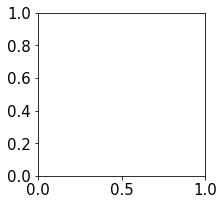

In [ ]:
#l'oggetto principale sono le figure
ax = pl.figure(figsize=(3,3)).add_subplot(111); # figsize non si sa in che unità, dipende dalla piattaforma 

#aggiungo un subplot, lo faccio anche se voglio mettere più plot nella stessa figura
#111 metto un subplot come riga, uno come colonna e 1 perchè ne sto mettendo solo 1(?)
#il return value è un axis object, lo salvo in ax così poi potrò cambiare gli assi

AttributeError: ignored

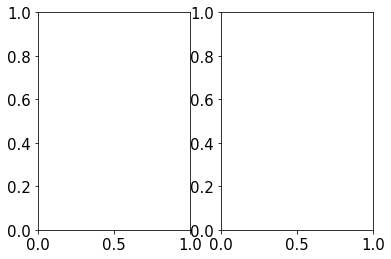

In [ ]:
fig=pl.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(myx,myy, 'k--', label="some y value") #stesse cose di matlab
ax2=plot(myx,myy2, 'ro',ms = 20, label='something else') #cambio il MARKER SIZE
ax1.legend(fontsize = 20) #controllo il font in modo indipendente dagli axis labels
ylim = ax1.get_ylim()
ax2.set_ylim(ylim)

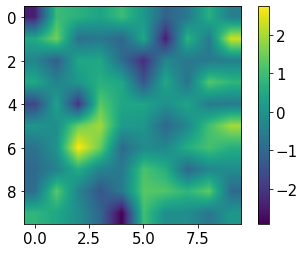

In [ ]:
pl.imshow(np.random.randn(10,10), interpolation='bilinear') #interpolation dipende dalla versione di python 
pl.colorbar()